# **Alunos**
*   Victor Hugo da Silva Vieira  **Matrícula**: 2018101976
*   Gustavo Fernandes Gusmão     **Matrícula**: 2024000014

# **Professores**
*   Sérgio Monteiro
*   Manuel Martins


In [4]:
#Alunos
#alunos = c("Victor Hugo da Silva Vieira",
#           "Gustavo Fernandes Gusmão")

#matrículas = c("2018101976",
#               "2024000014")

#Título
título = "Trabalho da Disciplina de Programação em R da Pós Graduação de Ciência de Dados da Unicarioca"
professor = "Sérgio Monteiro, DSc"

#install.packages('quantmod')
#install.packages('TTR')

# Carregar pacotes
library(quantmod)
library(TTR)
library(tidyverse)

#Período
start_date = "2021-01-01"
end_date = "2024-04-30"

# Escolhendo ação
quote = "BPAC3.SA"
#BPAC3.SA é a BTG Pactual

# Obtendo dados históricos
getSymbols(quote, src = "yahoo", from = start_date, to = end_date)
mkt_qt = na.omit(Ad(get(quote)))
head(mkt_qt)

# Preços ajustados
pcr_adjusted = Cl(BPAC3.SA)

[1] "BPAC3.SA"

           BPAC3.SA.Adjusted
2021-01-04          11.31063
2021-01-05          11.25847
2021-01-06          10.92413
2021-01-07          11.16173
2021-01-08          10.96165
2021-01-11          10.79015

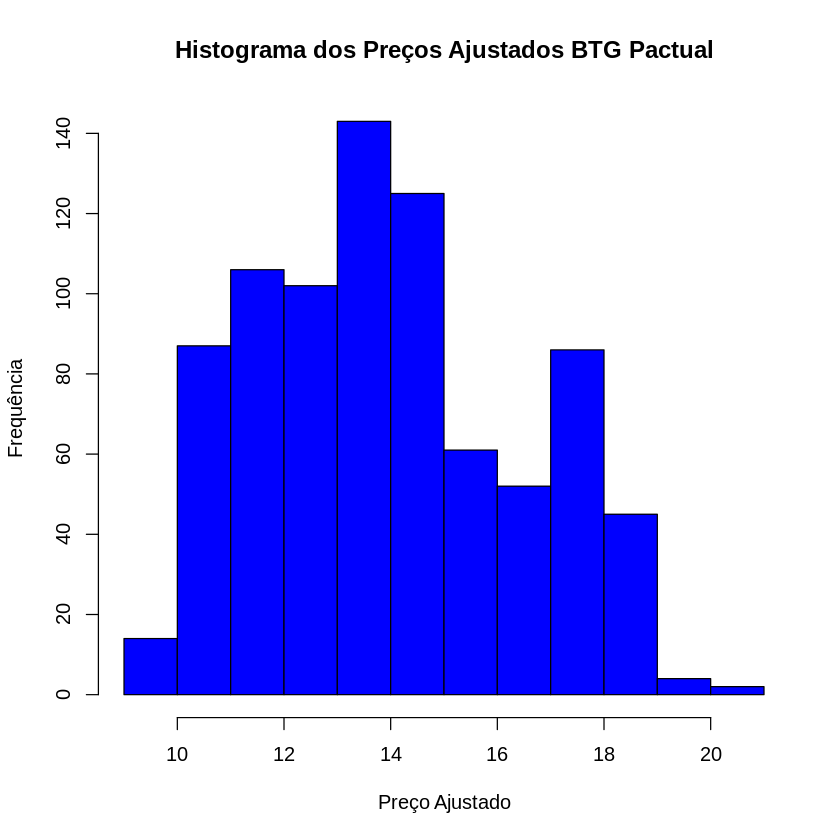

In [5]:
# Histograma
hist(mkt_qt, main = "Histograma dos Preços Ajustados BTG Pactual", xlab = "Preço Ajustado", ylab = 'Frequência', col = "blue")

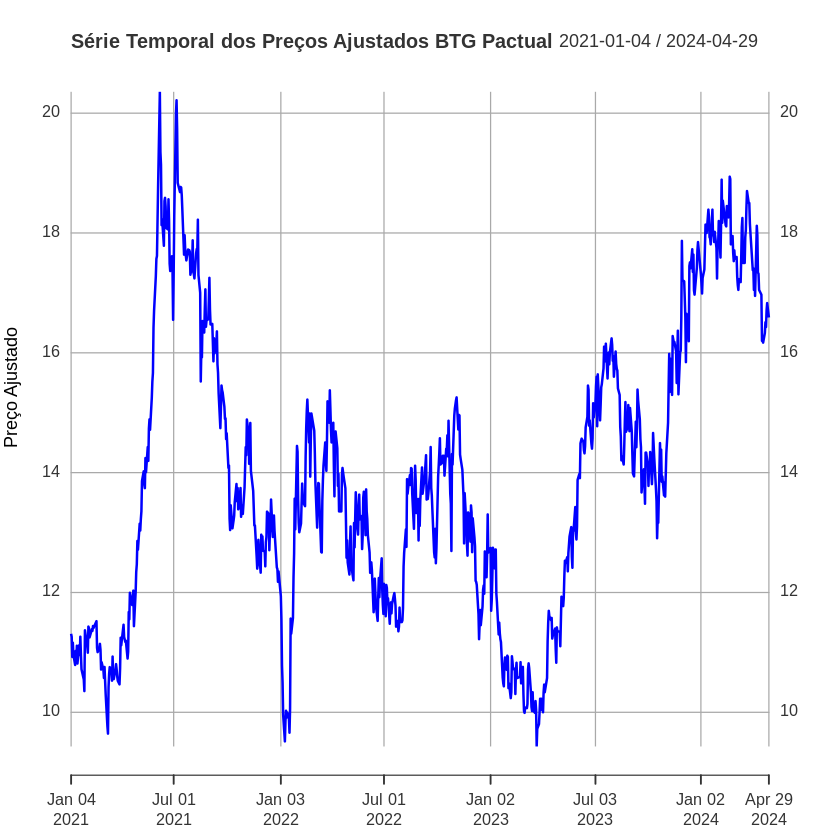

In [6]:
# Série temporal
plot(mkt_qt, main = "Série Temporal dos Preços Ajustados BTG Pactual", ylab = "Preço Ajustado", col = "blue")


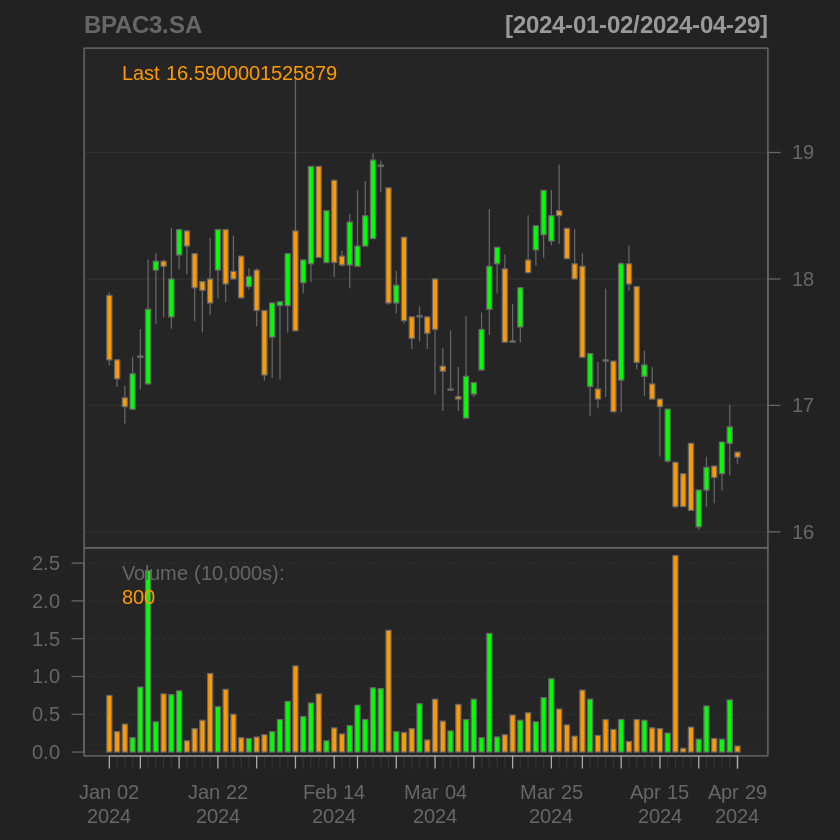

In [7]:
# Gráfico de vela
# Janeiro/24 a Abril/24
chartSeries(BPAC3.SA,
            type="candlesticks",
            subset='2024-01-01::2024-04-30')

# **Médias móveis**
Sinalizações
*   Quando a média menor cruza com a maior de baixo pra cima, é sinal de compra
*   Quando a média menor cruza com a maior de cima pra baixo, é sinal de venda


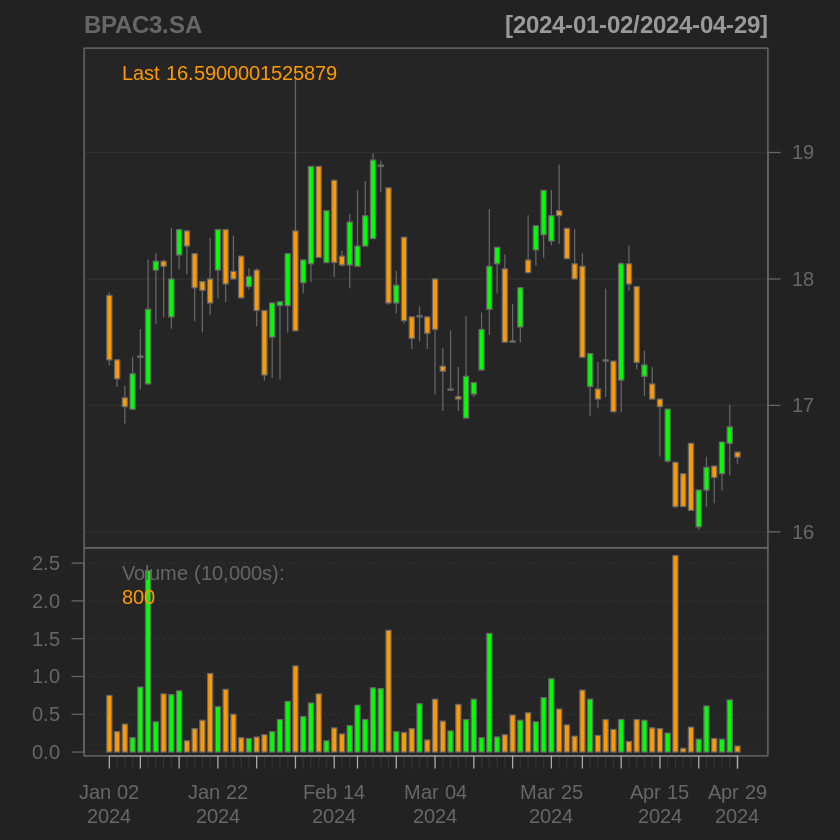

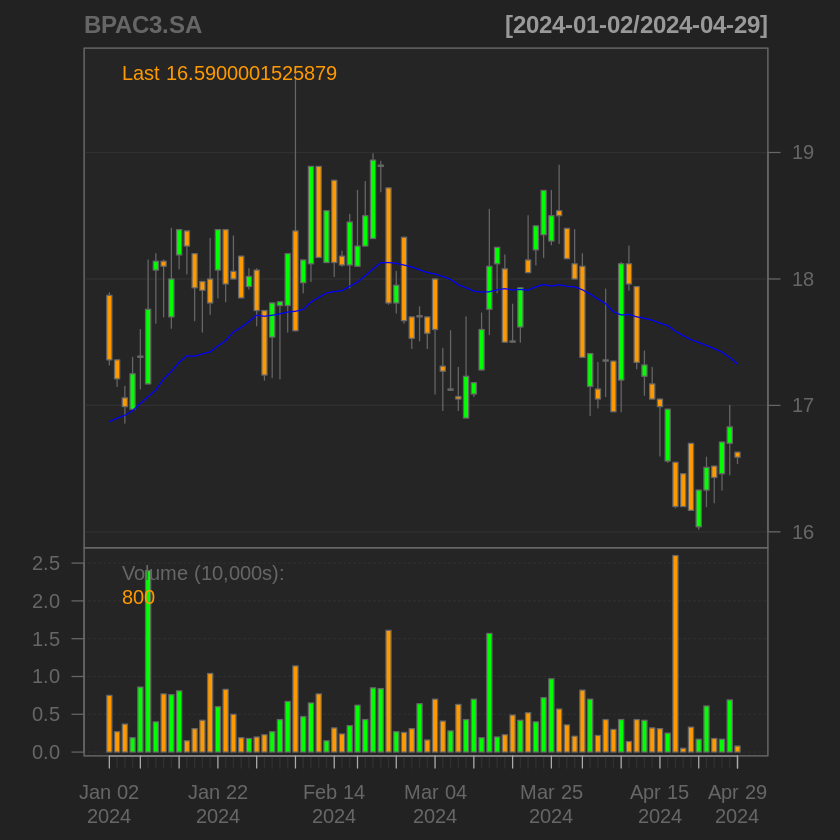

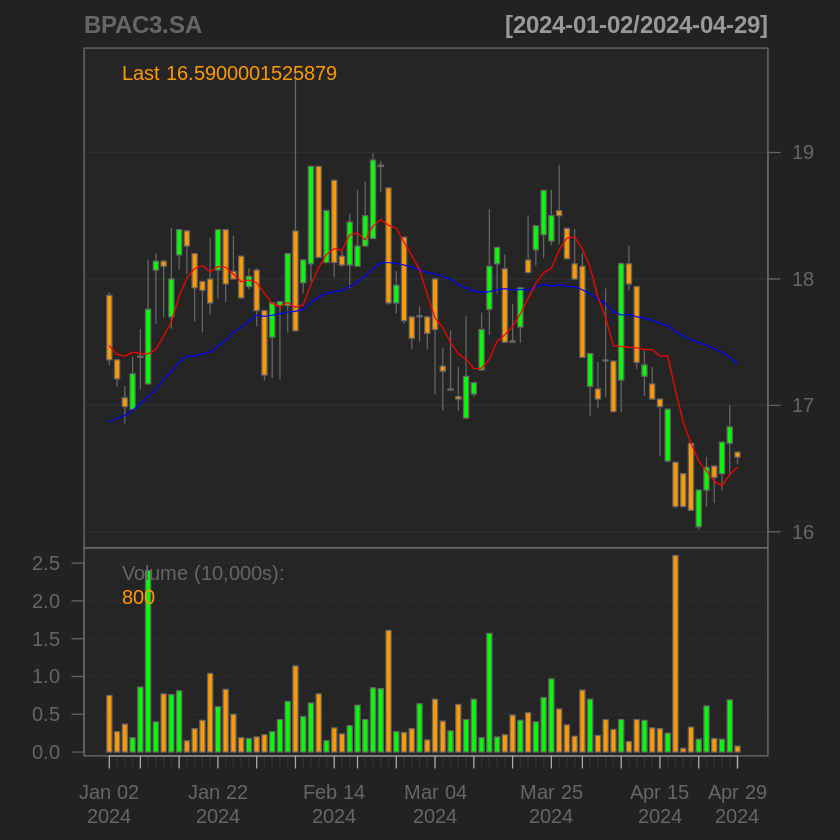

In [9]:
# Gráfico de velas com médias móveis de 2024
chartSeries(BPAC3.SA,
            subset = '2024-01-01::2024-04-30',
            theme = chartTheme('black'))
addSMA(n = 31,on = 1,col = "blue")
addSMA(n = 7,on = 1,col = "red")

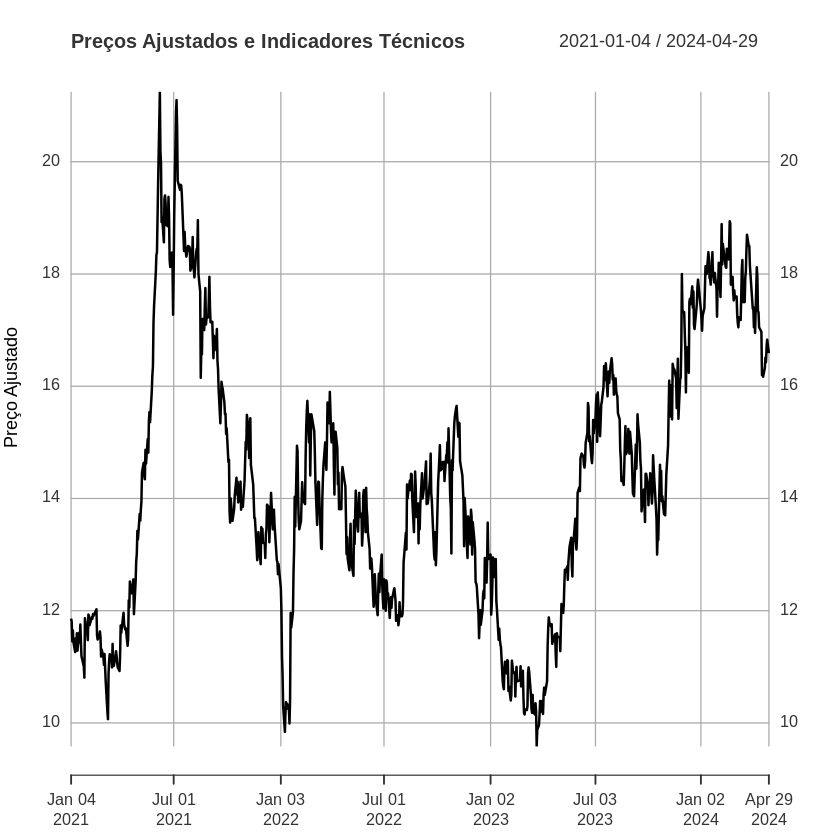

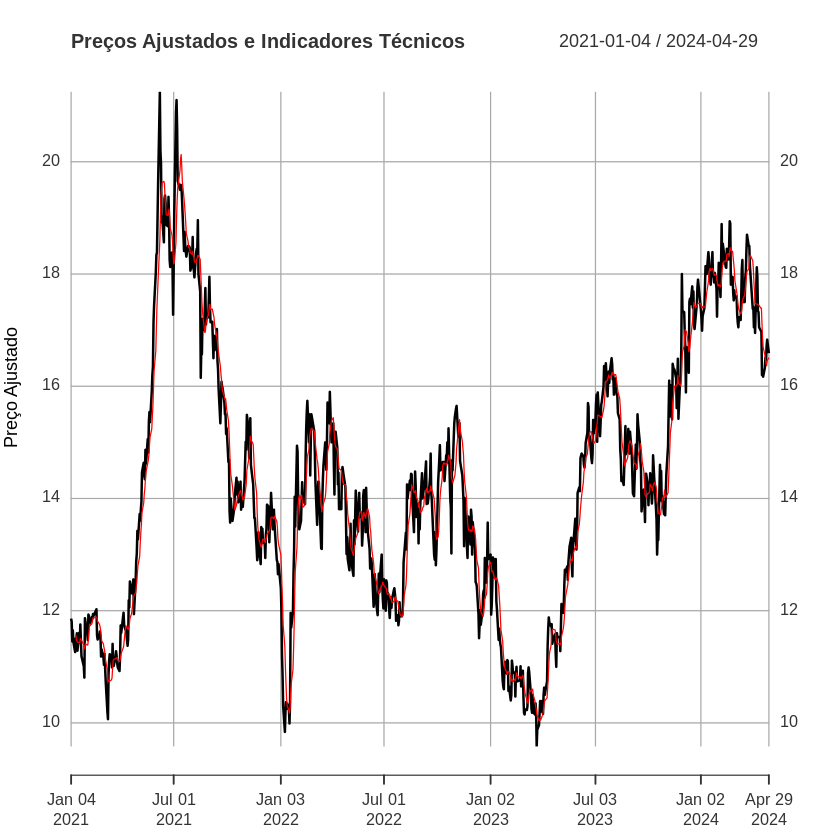

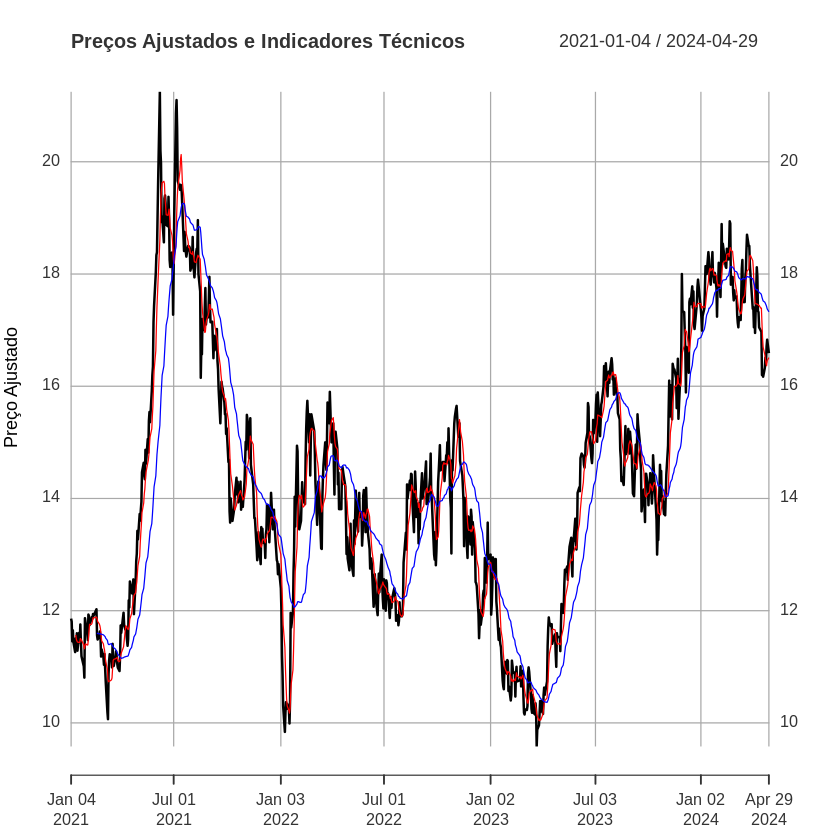

In [10]:
# médias móveis - 7 e 31 dias
sma_7 = SMA(pcr_adjusted,n=7)
sma_31 = SMA(pcr_adjusted,n=31)

# Valores de médias móveis no gráfico de série
plot(pcr_adjusted, type = "l", col = "black", main = "Preços Ajustados e Indicadores Técnicos",
     ylab = "Preço Ajustado", bg = 'white')
lines(sma_7, col = "red")
lines(sma_31, col = "blue")

# **Bollinger**

Sinalização
*   É sinal de compra se o preço cruzar acima da média móvel de curto prazo e estiver abaixo do envelope superior de Bollinger
*   É sinal de venda se o preço cruzar abaixo da média móvel de curto prazo e estiver acima do envelope inferior de Bollinger


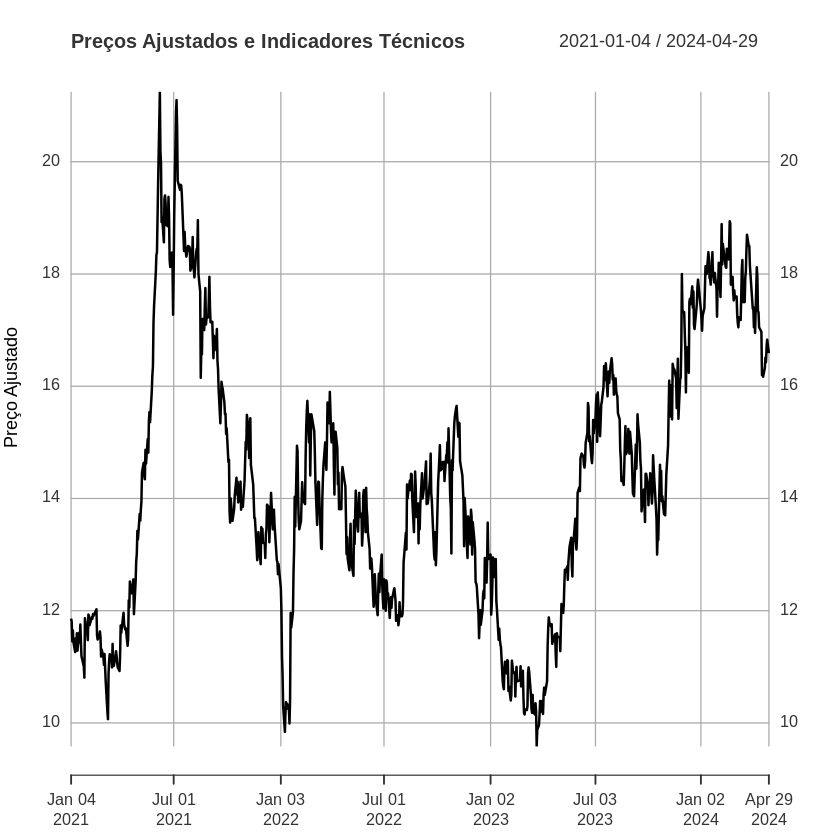

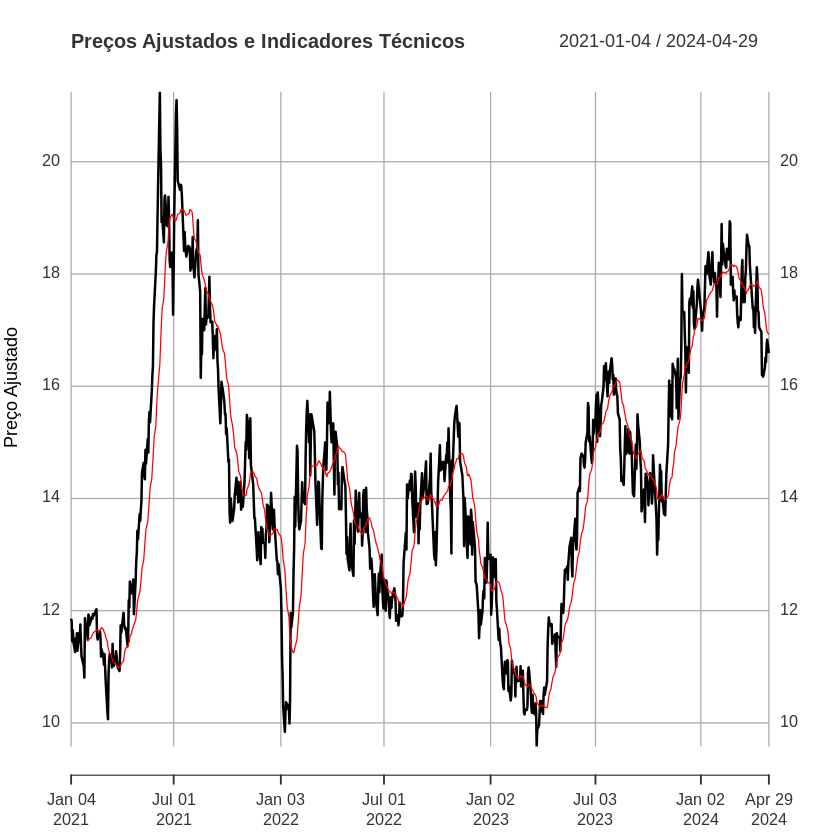

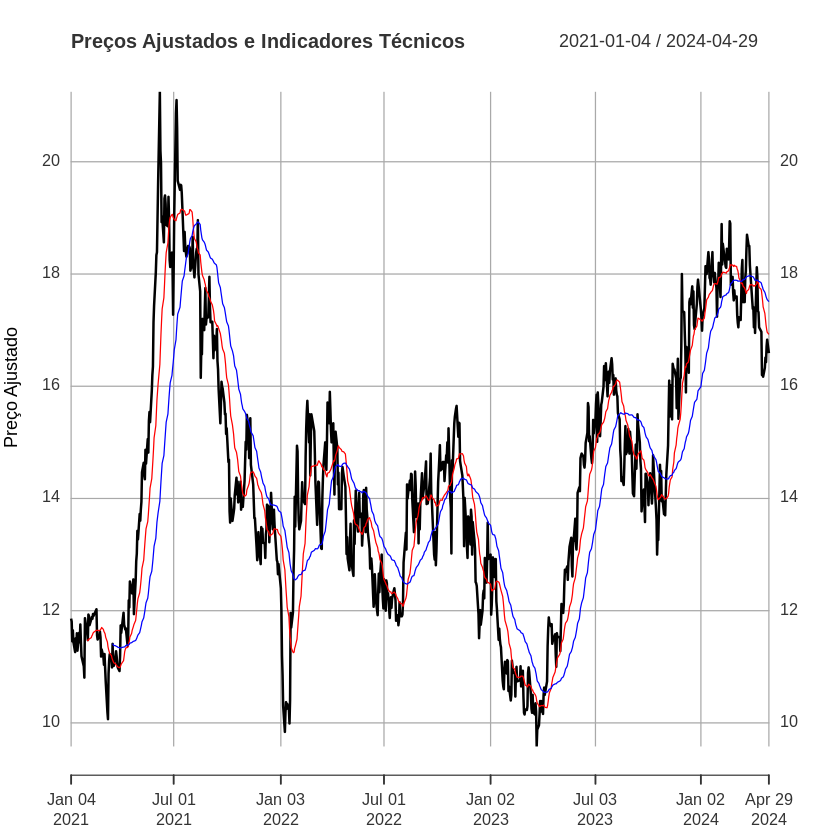

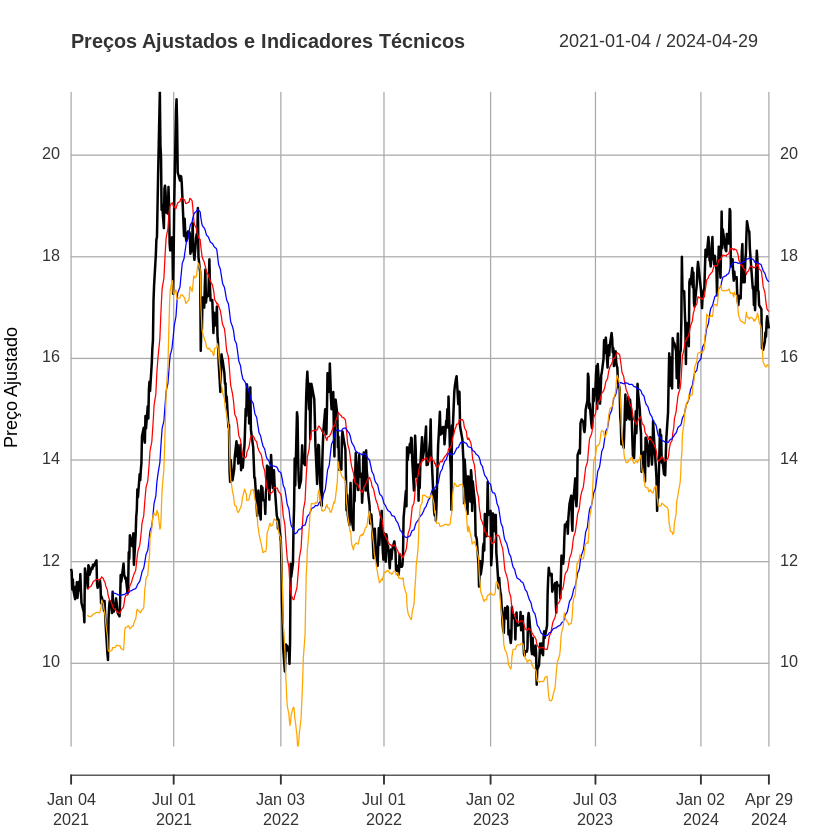

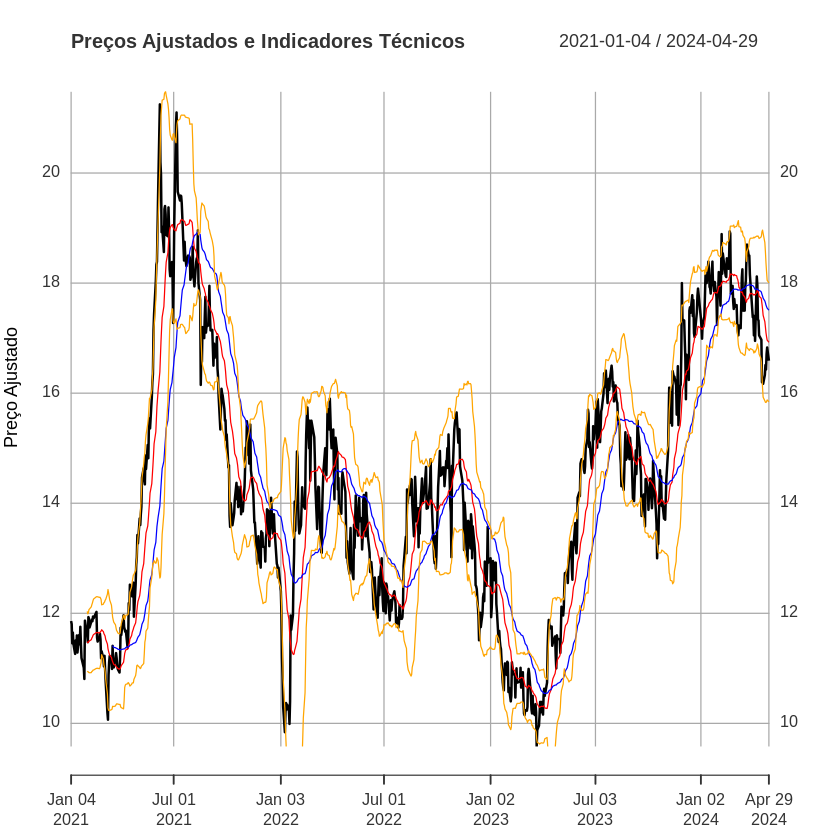

In [11]:
# Médias móveis para Bollinger
sma_20 = SMA(pcr_adjusted,n=20)
sma_50 = SMA(pcr_adjusted,n=50)

# Calculando Bollinger
BPAC3.SA$dn = BBands(pcr_adjusted, n = 20, maType = "SMA", sd = 2)$dn
BPAC3.SA$up = BBands(pcr_adjusted, n = 20, maType = "SMA", sd = 2)$up

# Plot de médias móveis + Bollinger
plot(pcr_adjusted, type = "l", col = "black", main = "Preços Ajustados e Indicadores Técnicos",
     ylab = "Preço Ajustado", bg = 'white')
lines(sma_20, col = "red")
lines(sma_50, col = "blue")
lines(BPAC3.SA$dn, col = "orange")
lines(BPAC3.SA$up, col = "orange")


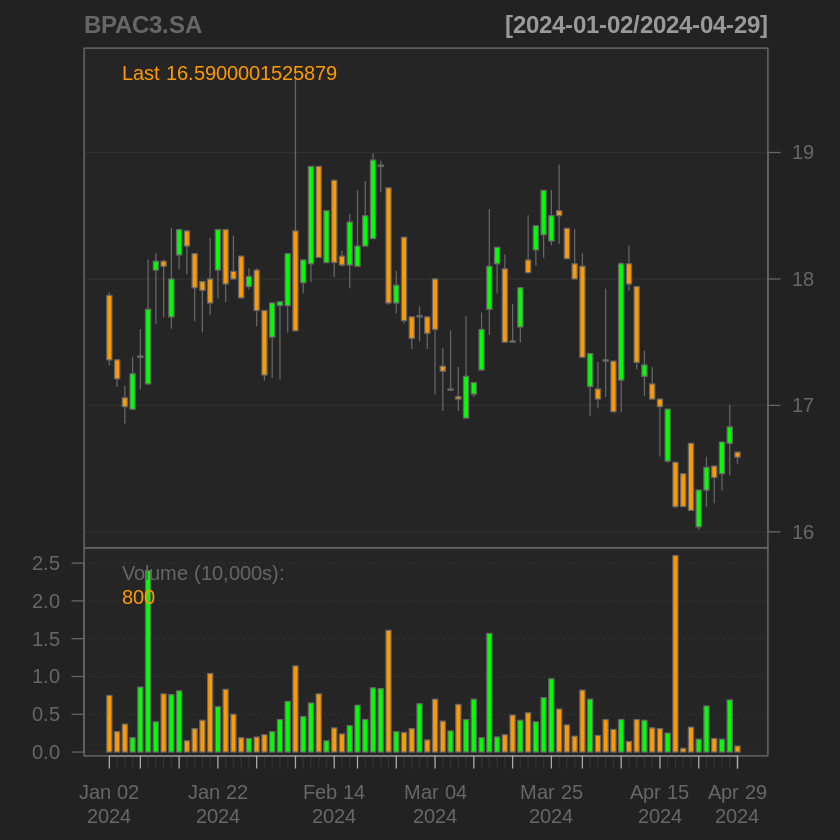

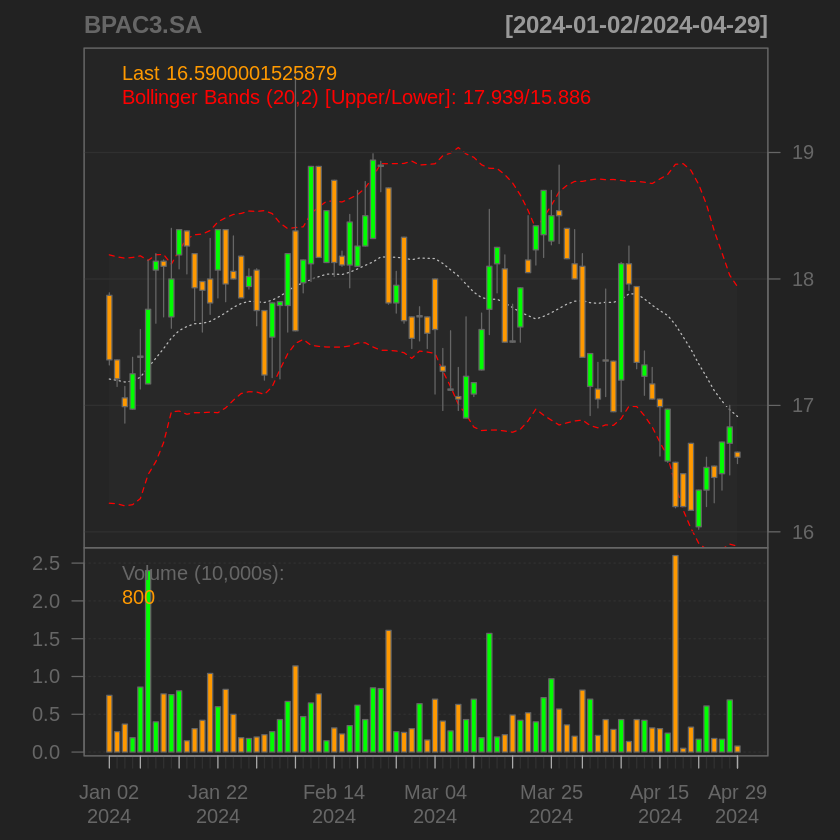

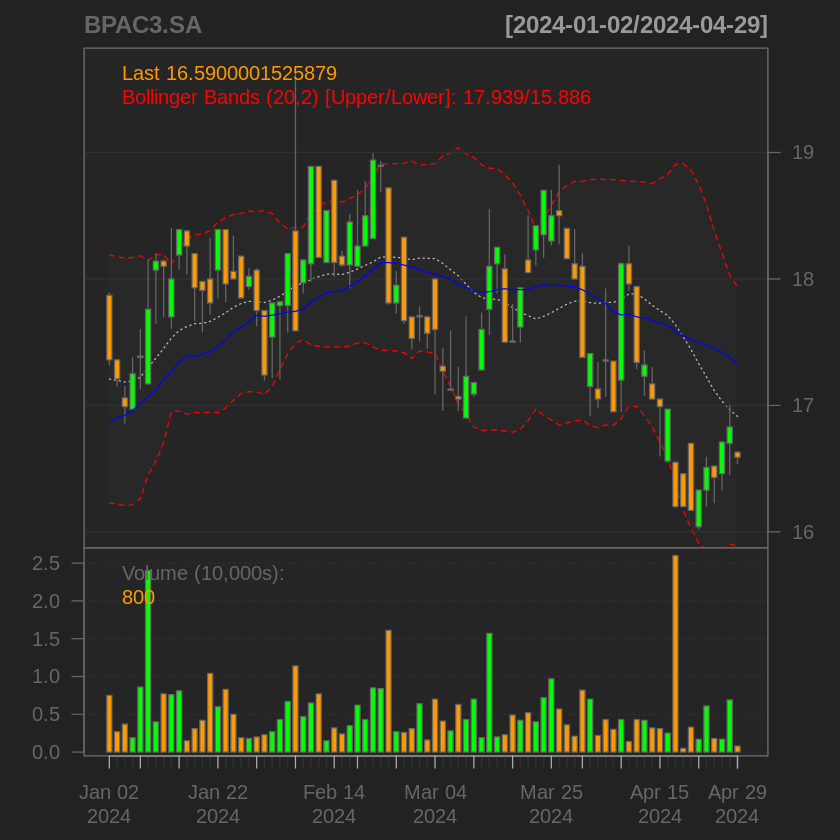

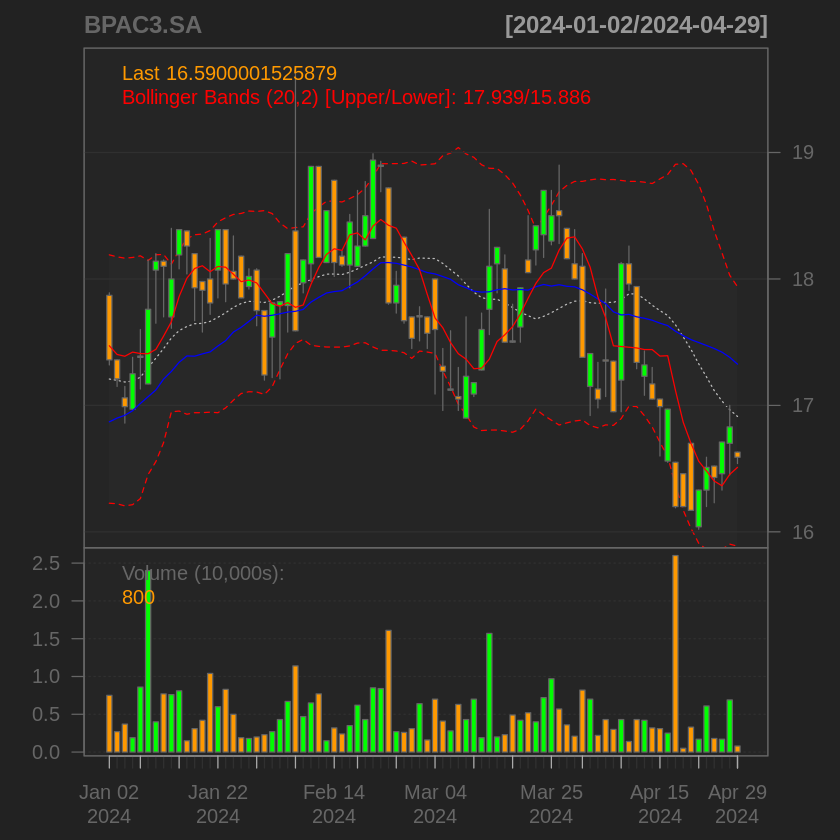

In [14]:
# Adicionando banda de Bollinger ao gráfico de vela
chartSeries(BPAC3.SA,
            subset='2024-01-01::2024-04-30',
            theme=chartTheme('black'))
addBBands(n=20,sd=2)
addSMA(n = 31,on = 1,col = "blue")
addSMA(n = 7,on = 1,col = "red")



# **Taxa de variação**

Sinalização
*   Sinal de compra quando o indicador estiver trabalhando acima de 0
*   Sinal de venda quando o indicador estiver trabalhando abaixo de 0

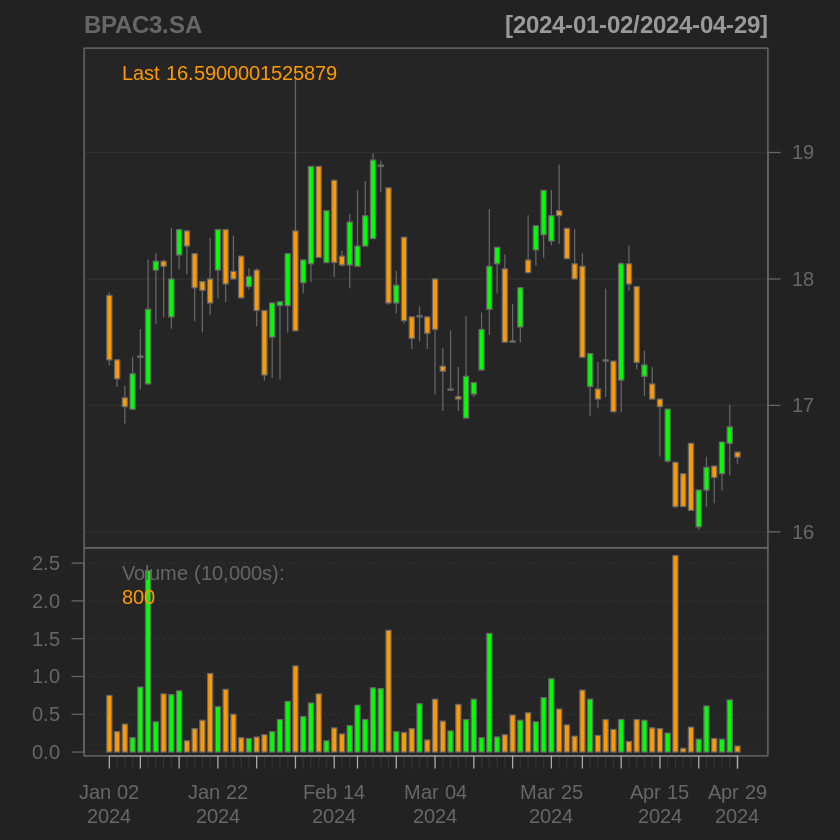

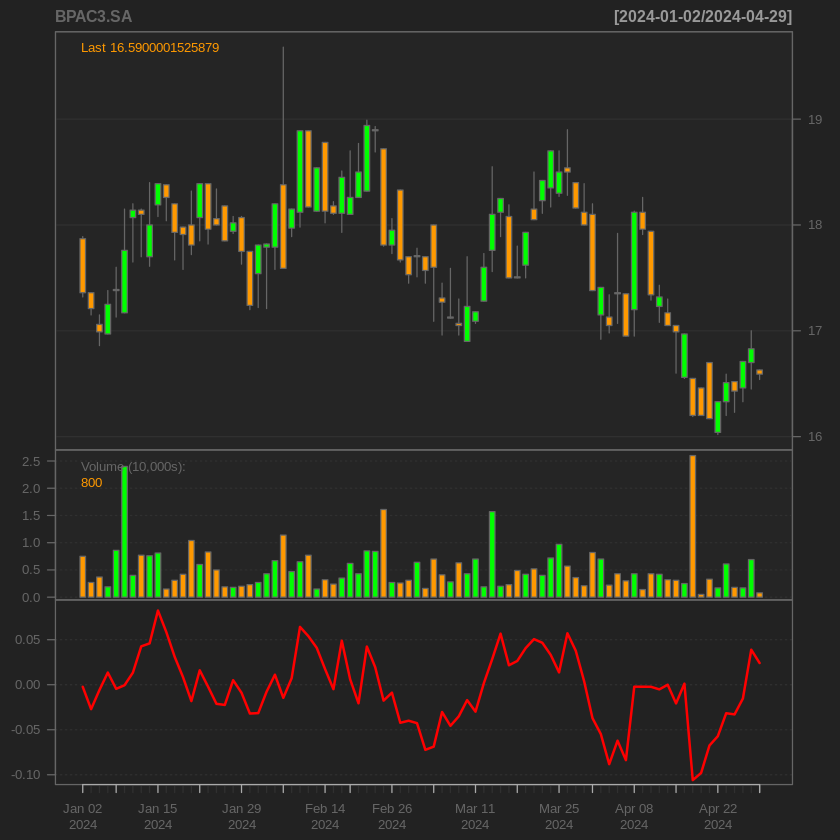

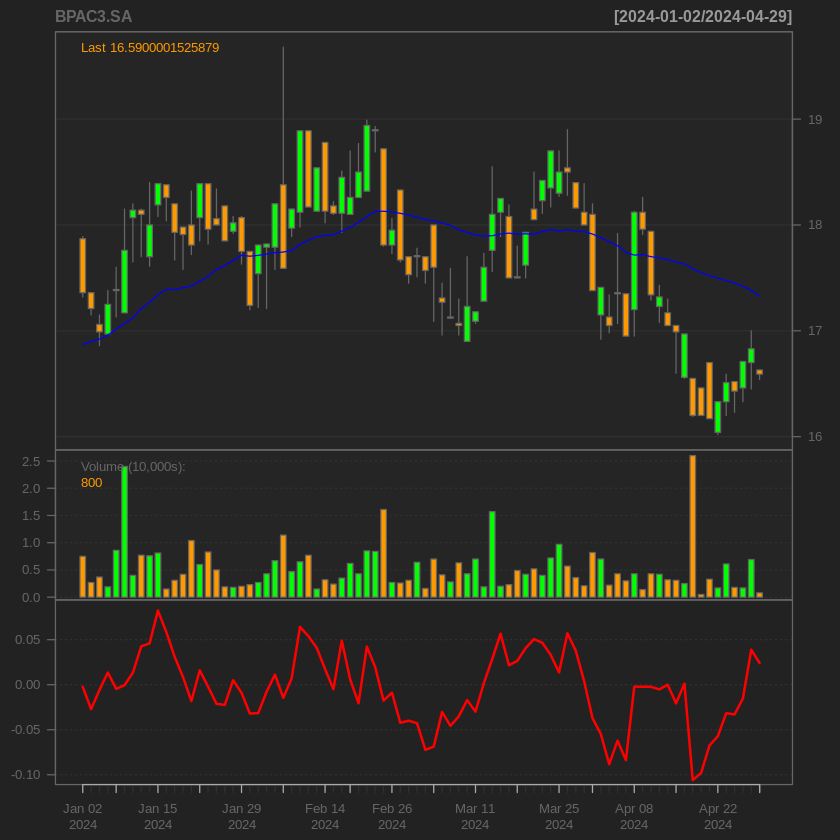

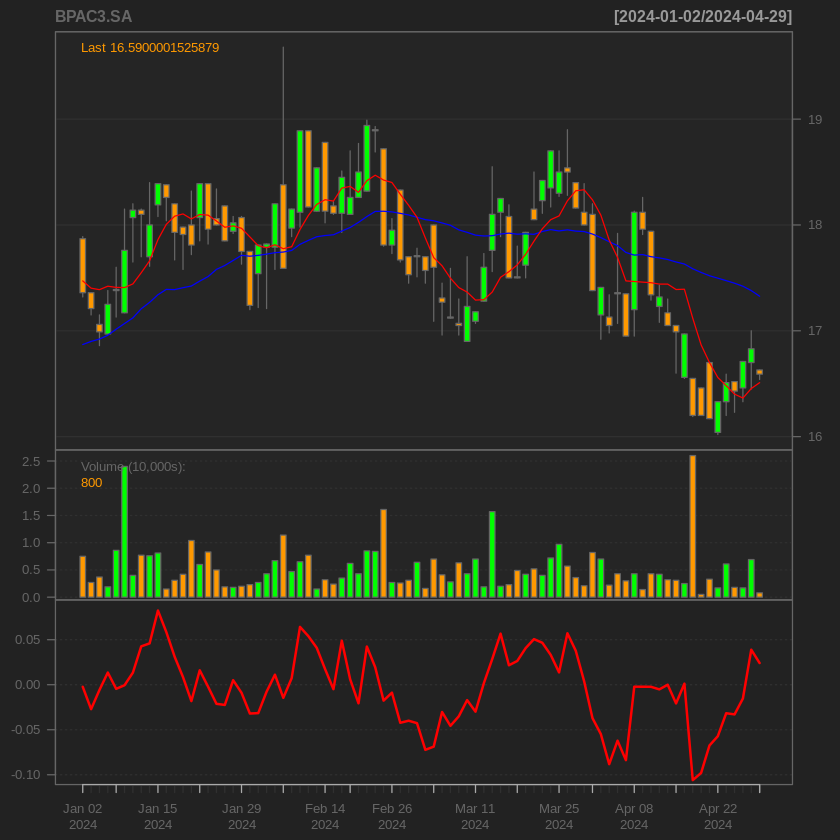

In [16]:
# Adicionando ROC ao gráfico de velas
chartSeries(BPAC3.SA,
            subset='2024-01-01::2024-04-30',
            theme=chartTheme('black'))
addROC(n=7)
addSMA(n = 31,on = 1,col = "blue")
addSMA(n = 7,on = 1,col = "red")

# **Informações**

**06/02/2024**
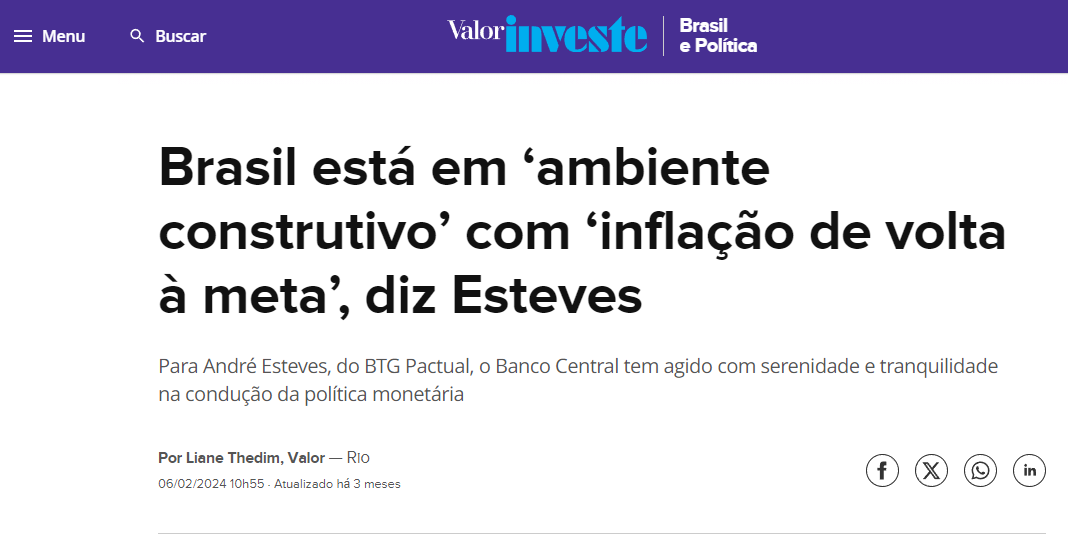

**27/02/2024**

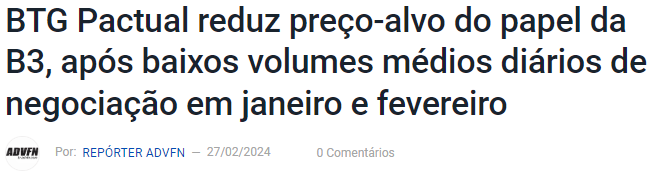


**05/03/2024**

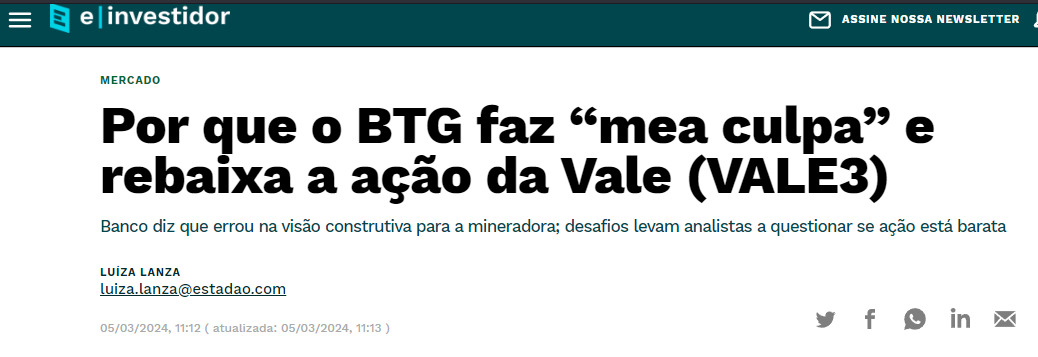


**07/03/2024**

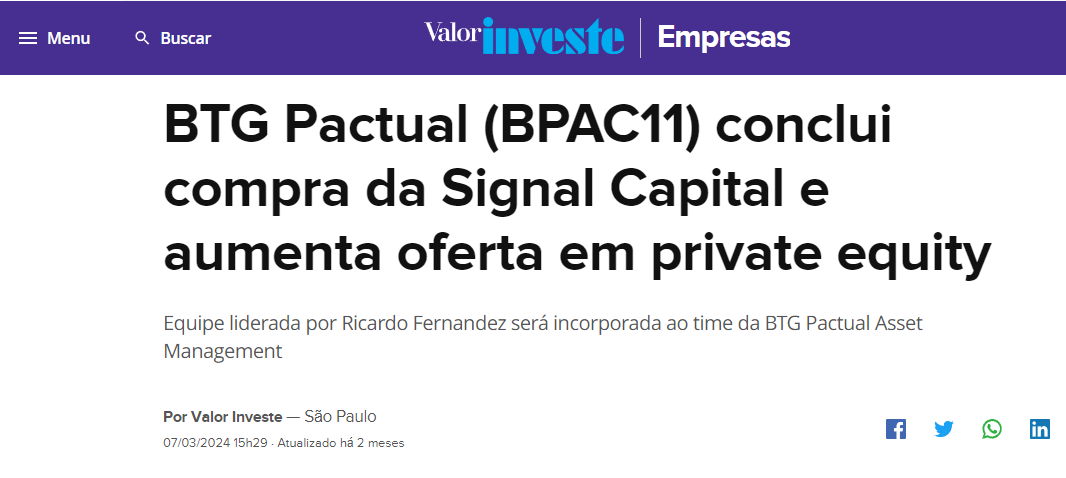


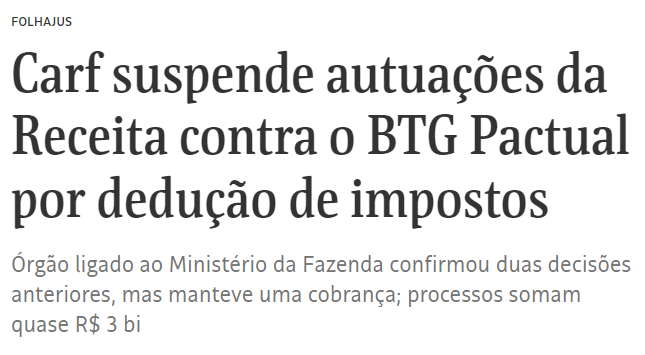